In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from pathlib import Path

from env import host, user, password

import wrangle as w

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score 
from math import sqrt

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.cluster import KMeans

Exploration: the interaction between independent variables and the target variable is explored using visualization and statistical testing
Exploration: Clustering is used to explore the data. A conclusion, supported by statistical testing and visualization, is drawn on whether or not the clusters are helpful/useful. At least 3 combinations of features for clustering should be tried.

In [2]:
w.wrangle_zillow()

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
0,14297519,0.025595,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,53571.0,...,1.076313,0.103444,0.1,0.7,156.681613,0.5,119.300710,0.5,0.875000,0
1,17052889,0.055619,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,...,1.222517,0.290335,0.3,0.3,60.068259,0.2,29.730371,0.3,0.500000,0
2,14186244,0.005383,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,...,1.148823,0.193572,0.2,0.2,68.615447,0.2,56.865394,0.4,0.666667,0
3,12177905,-0.103410,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,...,1.224661,0.299311,0.3,0.5,45.840909,0.1,2.778417,0.1,0.750000,0
4,12095076,-0.001011,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,47019.0,...,1.230599,1.446281,0.5,0.6,93.411209,0.3,7.882841,0.2,0.750000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50672,11000655,0.020615,2.0,2.0,1286.0,6037.0,34245368.0,-118282383.0,47405.0,12447.0,...,1.262878,1.088269,0.5,0.3,55.145412,0.2,5.984685,0.2,1.000000,1
50673,17239384,0.013209,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,...,1.647913,0.277893,0.3,0.4,31.441067,0.1,1.364891,0.1,0.500000,0
50674,12773139,0.037129,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,...,1.768922,0.116483,0.1,0.2,31.780039,0.1,3.300946,0.1,0.333333,0
50675,12826780,0.007204,2.0,3.0,1762.0,6037.0,33937685.0,-117996709.0,6347.0,14634.0,...,1.210182,0.145707,0.1,0.4,79.455165,0.3,60.185915,0.4,0.666667,0


In [3]:
df=w.wrangle_zillow()

In [4]:
train, validate, test = w.split_data(df)

In [5]:
train.head()

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
40409,14357041,-0.001358,3.5,3.0,2820.0,6059.0,33701815.0,-117717952.0,5492.0,52650.0,...,1.435365,0.126079,0.1,0.6,167.602837,0.5,119.641843,0.5,1.166667,0
23172,11185767,0.044035,4.0,4.0,2764.0,6037.0,34610159.0,-118192962.0,6624.0,40227.0,...,1.756942,0.152066,0.2,0.6,37.442475,0.1,9.500302,0.2,1.000000,0
49707,11471750,0.026075,3.0,4.0,2044.0,6037.0,33924794.0,-118423837.0,4967.0,55753.0,...,1.118434,0.114027,0.1,0.5,169.431996,0.5,158.594725,0.5,0.750000,0
36587,14234304,-0.051115,3.0,4.0,1622.0,6059.0,33795264.0,-117827395.0,7399.0,33252.0,...,1.110092,0.169858,0.2,0.4,64.356350,0.2,46.887282,0.3,0.750000,0
6405,12992951,0.110311,2.0,3.0,1050.0,6037.0,34048144.0,-117985938.0,5871.0,118895.0,...,1.282477,0.134780,0.1,0.2,89.523810,0.3,48.203032,0.3,0.666667,0


<AxesSubplot:xlabel='sq_feet', ylabel='logerror'>

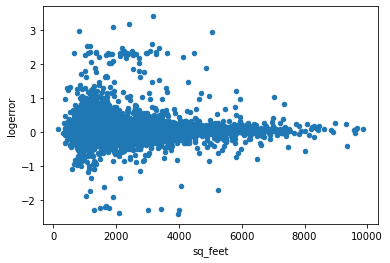

In [6]:
train.plot.scatter(x='sq_feet', y='logerror')

Observation:
    Smaller the square footage, the amounts is more than larger square footage house. As square footage increases, it appears to decrease the amountof error. There is no linear relationship, so this is a bad candidate for a statistical test.

Does being in a specific cluster drive log error?

Are the dots doing anything noteworthy?

<AxesSubplot:xlabel='bedrooms', ylabel='logerror'>

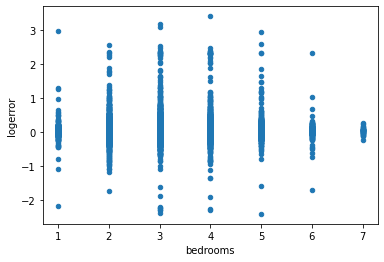

In [7]:
train.plot.scatter(x='bedrooms', y='logerror')

In [8]:
train.describe()

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
count,2.837800e+04,28378.000000,28378.000000,28378.000000,28378.000000,28378.000000,2.837800e+04,2.837800e+04,28378.000000,28378.000000,...,28378.000000,28378.000000,28378.000000,28378.000000,28378.000000,28378.000000,28378.000000,28378.000000,28378.000000,28378.000000
mean,1.296552e+07,0.018335,2.278561,3.299070,1899.725210,6049.224117,3.402038e+07,-1.181930e+08,9723.700437,33598.860385,...,1.324238,0.223225,0.166400,0.392357,90.391866,0.278501,48.911702,0.290450,0.694424,0.222003
std,2.324646e+06,0.171118,0.972921,0.912162,936.585484,21.052068,2.723130e+05,3.549949e+05,20320.700763,49312.946473,...,0.354081,0.466499,0.102396,0.186388,59.768660,0.147071,74.545501,0.129001,0.232612,0.415600
min,1.071188e+07,-2.406257,1.000000,1.000000,152.000000,6037.000000,3.334122e+07,-1.194753e+08,236.000000,3491.000000,...,0.015673,0.005418,0.000000,0.000000,0.039833,0.000000,0.027992,0.000000,0.200000,0.000000
25%,1.151795e+07,-0.024850,2.000000,3.000000,1266.000000,6037.000000,3.382670e+07,-1.183969e+08,5562.000000,12447.000000,...,1.163061,0.127686,0.100000,0.300000,54.566588,0.200000,9.531494,0.200000,0.500000,0.000000
50%,1.259097e+07,0.006983,2.000000,3.000000,1644.000000,6037.000000,3.401950e+07,-1.181497e+08,6789.000000,24812.000000,...,1.231766,0.155854,0.200000,0.400000,81.602134,0.300000,30.556011,0.300000,0.666667,0.000000
75%,1.413387e+07,0.040299,3.000000,4.000000,2286.000000,6059.000000,3.418533e+07,-1.179294e+08,8683.000000,40227.000000,...,1.364930,0.199334,0.200000,0.500000,112.850533,0.400000,60.327676,0.400000,0.800000,0.000000
max,1.629606e+08,3.394544,7.000000,7.000000,9848.000000,6111.000000,3.481064e+07,-1.175723e+08,766570.000000,396556.000000,...,9.805110,17.598026,0.700000,0.900000,1444.221106,0.900000,1882.546201,0.900000,3.000000,1.000000


In [9]:
train['logerror_abs']=train.logerror.abs()

In [10]:
train.head()

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_abs
40409,14357041,-0.001358,3.5,3.0,2820.0,6059.0,33701815.0,-117717952.0,5492.0,52650.0,...,0.126079,0.1,0.6,167.602837,0.5,119.641843,0.5,1.166667,0,0.001358
23172,11185767,0.044035,4.0,4.0,2764.0,6037.0,34610159.0,-118192962.0,6624.0,40227.0,...,0.152066,0.2,0.6,37.442475,0.1,9.500302,0.2,1.000000,0,0.044035
49707,11471750,0.026075,3.0,4.0,2044.0,6037.0,33924794.0,-118423837.0,4967.0,55753.0,...,0.114027,0.1,0.5,169.431996,0.5,158.594725,0.5,0.750000,0,0.026075
36587,14234304,-0.051115,3.0,4.0,1622.0,6059.0,33795264.0,-117827395.0,7399.0,33252.0,...,0.169858,0.2,0.4,64.356350,0.2,46.887282,0.3,0.750000,0,0.051115
6405,12992951,0.110311,2.0,3.0,1050.0,6037.0,34048144.0,-117985938.0,5871.0,118895.0,...,0.134780,0.1,0.2,89.523810,0.3,48.203032,0.3,0.666667,0,0.110311


In [11]:
bed1=train[train.bedrooms==1].logerror_abs.mean()

In [12]:
bed1

0.12877820682615254

In [13]:
bed2=train[train.bedrooms==2].logerror_abs.mean()

In [14]:
bed2

0.08744989964472724

In [15]:
bed3=train[train.bedrooms==3].logerror_abs.mean()

In [16]:
bed3

0.06675716869537048

In [17]:
bed4=train[train.bedrooms==4].logerror_abs.mean()

In [18]:
bed4

0.06582466291983807

In [19]:
bed5=train[train.bedrooms==5].logerror_abs.mean()

In [20]:
bed5

0.07758039842762406

In [21]:
bed6=train[train.bedrooms==6].logerror_abs.mean()

In [22]:
bed6

0.08848812505464751

In [23]:
bed7=train[train.bedrooms==7].logerror_abs.mean()

In [24]:
bed7

0.07449619434495322

In [25]:
bed_number=[1,2,3,4,5,6,7]
bed_height=[bed1, bed2, bed3, bed4, bed5, bed6, bed7]

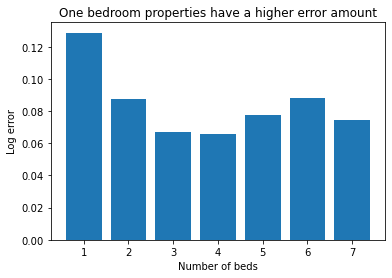

In [26]:
plt.bar(x=bed_number, height=bed_height)
plt.xlabel("Number of beds")
plt.ylabel("Log error")
plt.title("One bedroom properties have a higher error amount")
plt.show()

Using the mean of the absolute value of the log error, the graph shows that the number of bedroomsis heavily skewed at 1 bed and then it decreaes from 3 to 4 bedrooms, and then rises again from 4-6, then drops againat 7.

 1 bedroom has a higher logerror abs mean so the regression model might be better if that 1 bedroom is used as feature. one or not.

In [28]:
train_scaled, validate_scaled, test_scaled=w.scale_data(train, validate, test)

In [29]:
train_scaled.head()

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_abs
40409,14357041,0.414580,0.416667,0.333333,0.275165,6059.0,0.245398,0.923479,0.006859,52650.0,...,0.006859,0.1,0.6,0.116026,0.5,0.063539,0.5,0.345238,0,0.001358
23172,11185767,0.422406,0.500000,0.500000,0.269389,6037.0,0.863565,0.673858,0.008336,40227.0,...,0.008336,0.2,0.6,0.025899,0.1,0.005032,0.2,0.285714,0,0.044035
49707,11471750,0.419310,0.333333,0.500000,0.195132,6037.0,0.397145,0.552532,0.006174,55753.0,...,0.006174,0.1,0.5,0.117293,0.5,0.084231,0.5,0.196429,0,0.026075
36587,14234304,0.406003,0.333333,0.500000,0.151609,6059.0,0.308994,0.865966,0.009347,33252.0,...,0.009347,0.2,0.4,0.044535,0.2,0.024892,0.3,0.196429,0,0.051115
6405,12992951,0.433831,0.166667,0.333333,0.092616,6037.0,0.481090,0.782651,0.007353,118895.0,...,0.007353,0.1,0.2,0.061962,0.3,0.025591,0.3,0.166667,0,0.110311


Assuming normal distribution, use Pearsonsr correlation.

In [30]:
pearson_corr= train_scaled.corr(method='pearson')
pearson_corr

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_abs
parcelid,1.000000,0.012369,0.086920,0.108231,0.091019,0.710135,-0.239917,-0.074156,-0.025973,-0.022828,...,-0.025973,-0.057260,0.103678,0.024081,0.052502,0.044431,0.093747,0.028367,-0.364576,-0.034641
logerror,0.012369,1.000000,0.028778,0.028785,0.032193,0.007235,-0.016768,0.028789,0.003579,0.010212,...,0.003579,0.007225,0.025029,-0.038802,-0.036686,-0.013311,-0.025110,0.009372,-0.027550,0.494944
bathrooms,0.086920,0.028778,1.000000,0.641902,0.847796,0.125028,-0.033856,0.012193,0.127202,-0.053728,...,0.127202,0.319262,0.821433,0.344681,0.374689,0.181762,0.175651,0.685867,-0.045270,-0.004944
bedrooms,0.108231,0.028785,0.641902,1.000000,0.631444,0.148381,0.005074,0.005207,0.063415,-0.045229,...,0.063415,0.273749,0.667828,0.126255,0.155158,0.005939,0.011904,-0.058406,-0.108588,-0.027373
sq_feet,0.091019,0.032193,0.847796,0.631444,1.000000,0.130696,-0.063703,0.012214,0.185366,-0.046682,...,0.185366,0.423073,0.918266,0.330055,0.352643,0.153775,0.156888,0.483628,-0.031711,0.025953
fips,0.710135,0.007235,0.125028,0.148381,0.130696,1.000000,-0.068768,-0.370492,0.000492,-0.040569,...,0.000492,-0.001761,0.152277,0.065550,0.108743,0.028560,0.068521,0.047457,-0.309887,-0.039172
latitude,-0.239917,-0.016768,-0.033856,0.005074,-0.063703,-0.068768,1.000000,-0.542903,0.132145,-0.020472,...,0.132145,0.300307,-0.047351,0.015413,0.044957,-0.272339,-0.388817,-0.048245,0.197616,-0.008334
longitude,-0.074156,0.028789,0.012193,0.005207,0.012214,-0.370492,-0.542903,1.000000,-0.060610,0.006811,...,-0.060610,-0.121544,0.015970,-0.120054,-0.122520,0.063230,0.078508,0.018354,-0.333685,-0.008325
lotsizesquarefeet,-0.025973,0.003579,0.127202,0.063415,0.185366,0.000492,0.132145,-0.060610,1.000000,-0.023546,...,1.000000,0.513922,0.143182,0.065380,0.073979,-0.099511,-0.199405,0.096095,0.005764,0.040672
regionidcity,-0.022828,0.010212,-0.053728,-0.045229,-0.046682,-0.040569,-0.020472,0.006811,-0.023546,1.000000,...,-0.023546,-0.037075,-0.055689,-0.024655,-0.023447,-0.002662,0.019192,-0.034425,-0.229132,0.004333


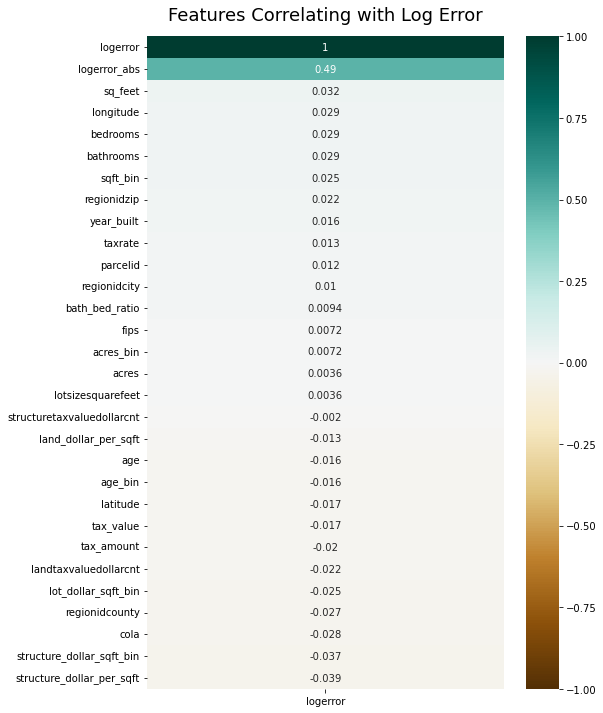

In [31]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='pearson')[['logerror']].sort_values(by='logerror', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Log Error', fontdict={'fontsize':18}, pad=16);

In [32]:
target_var= 'logerror'

In [33]:
# Use a scipy stats function pearson to calculate the correlation coefficient and the p-value.
def pearson_test(train_scaled, target_var, test_var):
    r, p_value = pearsonr(train_scaled[target_var], train_scaled[test_var])
    print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

In [34]:
pearson_test(train_scaled, target_var, 'bath_bed_ratio')

Correlation Coefficient: 0.009372484429086099
P-value: 0.11437450754268848


In [35]:
pearson_test(train_scaled, target_var, 'sq_feet')

Correlation Coefficient: 0.032193135236142506
P-value: 5.816619449748015e-08


In [36]:
pearson_test(train_scaled, target_var, 'bathrooms')

Correlation Coefficient: 0.028777728577437874
P-value: 1.2432280874524384e-06


In [37]:
pearson_test(train_scaled, target_var, 'bedrooms')

Correlation Coefficient: 0.02878533172855427
P-value: 1.235222645609095e-06


In [38]:
# list of variables I will cluster on. 
cluster_vars = ['bedrooms','bathrooms','sq_feet', ]
cluster_name = 'interior_clusterk6'
k_range = range(2,20)

In [39]:
X_train = train_scaled[['bedrooms','bathrooms', 'sq_feet']]

In [40]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

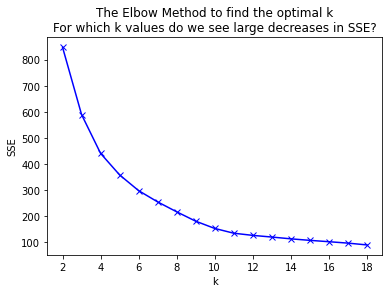

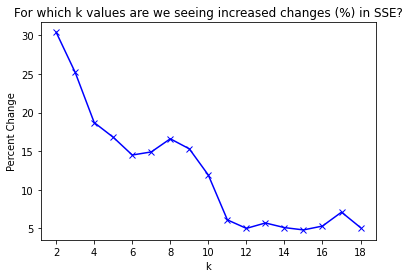

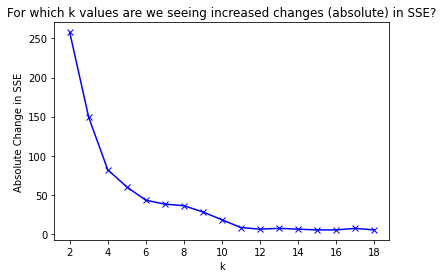

In [41]:
k_comparisons_df = find_k(X_train, cluster_vars, k_range)

In [42]:
k_comparisons_df

,k,sse,delta,pct_delta
0,2,847.182803,258.0,30.4
1,3,589.354716,149.0,25.2
2,4,440.679207,82.0,18.7
3,5,358.200285,60.0,16.8
4,6,297.973030,43.0,14.5
5,7,254.833569,38.0,14.9
6,8,216.915150,36.0,16.6
7,9,180.990426,28.0,15.3
8,10,153.260588,18.0,11.9
9,11,134.963590,8.0,6.1


In [43]:
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 123)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans


# Cluster 6

In [44]:
kmeans = create_clusters(X_train, 6, cluster_vars)

In [45]:
kmeans

KMeans(n_clusters=6, random_state=123)

In [46]:
# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df


In [47]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

In [48]:
centroid_df

,interior_clusterk6,centroid_bedrooms,centroid_bathrooms,centroid_sq_feet
0,0,0.640606,0.632983,0.432259
1,1,0.510666,0.173529,0.166290
2,2,0.221873,0.003030,0.093555
3,3,0.308121,0.170163,0.139503
4,4,0.541758,0.349059,0.255575
5,5,0.322810,0.336326,0.227642


In [49]:
# label cluster for each observation in X_train (X[0] in our X list of dataframes), 
# X_validate (X[1]), & X_test (X[2])

def assign_clusters(df, kmeans, cluster_vars, cluster_name, centroid_df):
    #for i in range(len(df)):
        clusters = pd.DataFrame(kmeans.predict(df[cluster_vars]), 
                            columns=[cluster_name], index=df.index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        df = pd.concat([df, clusters_centroids], axis=1)
        return df


In [50]:
X = assign_clusters(X_train, kmeans, cluster_vars, cluster_name, centroid_df)

In [51]:
X.head()

,bedrooms,bathrooms,sq_feet,interior_clusterk6,centroid_bedrooms,centroid_bathrooms,centroid_sq_feet
40409,0.333333,0.416667,0.275165,5,0.32281,0.336326,0.227642
23172,0.500000,0.500000,0.269389,5,0.32281,0.336326,0.227642
49707,0.500000,0.333333,0.195132,5,0.32281,0.336326,0.227642
36587,0.500000,0.333333,0.151609,5,0.32281,0.336326,0.227642
6405,0.333333,0.166667,0.092616,5,0.32281,0.336326,0.227642


In [52]:
pd.DataFrame(X.groupby(['interior_clusterk6', 'centroid_bedrooms','centroid_bathrooms', 'centroid_sq_feet'])['interior_clusterk6'].count())


,,,,interior_clusterk6
interior_clusterk6,centroid_bedrooms,centroid_bathrooms,centroid_sq_feet,
0,0.640606,0.632983,0.432259,1618
1,0.510666,0.173529,0.166290,4156
2,0.221873,0.003030,0.093555,5253
3,0.308121,0.170163,0.139503,9713
4,0.541758,0.349059,0.255575,4982
5,0.322810,0.336326,0.227642,2656


In [53]:
train_clusters = pd.concat([train, X['interior_clusterk6']], axis=1)

In [54]:
train_clusters

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_abs,interior_clusterk6
40409,14357041,-0.001358,3.5,3.0,2820.0,6059.0,33701815.0,-117717952.0,5492.0,52650.0,...,0.1,0.6,167.602837,0.5,119.641843,0.5,1.166667,0,0.001358,5
23172,11185767,0.044035,4.0,4.0,2764.0,6037.0,34610159.0,-118192962.0,6624.0,40227.0,...,0.2,0.6,37.442475,0.1,9.500302,0.2,1.000000,0,0.044035,5
49707,11471750,0.026075,3.0,4.0,2044.0,6037.0,33924794.0,-118423837.0,4967.0,55753.0,...,0.1,0.5,169.431996,0.5,158.594725,0.5,0.750000,0,0.026075,5
36587,14234304,-0.051115,3.0,4.0,1622.0,6059.0,33795264.0,-117827395.0,7399.0,33252.0,...,0.2,0.4,64.356350,0.2,46.887282,0.3,0.750000,0,0.051115,5
6405,12992951,0.110311,2.0,3.0,1050.0,6037.0,34048144.0,-117985938.0,5871.0,118895.0,...,0.1,0.2,89.523810,0.3,48.203032,0.3,0.666667,0,0.110311,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19982,17160255,0.007457,1.0,3.0,1000.0,6111.0,34205691.0,-119189493.0,6227.0,13150.0,...,0.1,0.1,99.748000,0.3,44.546652,0.3,0.333333,0,0.007457,0
1766,11663538,0.039340,3.0,4.0,2570.0,6037.0,34043592.0,-118526193.0,9006.0,12447.0,...,0.2,0.6,86.240467,0.3,84.465356,0.4,0.750000,1,0.039340,0
5102,12185674,1.191672,2.0,3.0,1292.0,6037.0,33988365.0,-118249664.0,3810.0,396053.0,...,0.0,0.3,72.534830,0.2,44.900000,0.3,0.666667,0,1.191672,0
34399,10731267,0.005839,2.0,3.0,2291.0,6037.0,34181498.0,-118619048.0,35778.0,12447.0,...,0.4,0.5,23.042340,0.0,1.400106,0.1,0.666667,1,0.005839,0


In [55]:
pd.DataFrame(train_clusters.groupby(['interior_clusterk6'])['interior_clusterk6'].count())


,interior_clusterk6
interior_clusterk6,
0,1618
1,4156
2,5253
3,9713
4,4982
5,2656


<AxesSubplot:xlabel='bedrooms', ylabel='logerror'>

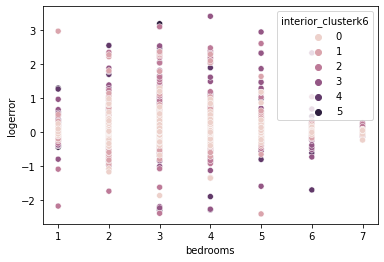

In [56]:
sns.scatterplot(train_clusters.bedrooms, train_clusters.logerror, hue=train_clusters.interior_clusterk6)

<AxesSubplot:xlabel='sq_feet', ylabel='logerror'>

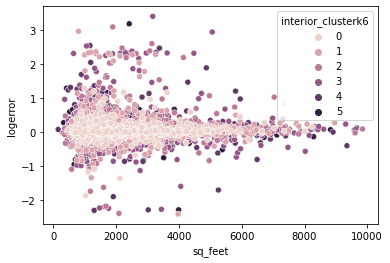

In [57]:
sns.scatterplot(train_clusters.sq_feet, train_clusters.logerror, hue=train_clusters.interior_clusterk6)

In [58]:
#train_clusters[train_clusters.interior_clusterk6 == 2]

In [59]:
#sns.scatterplot(train_clusters[train_clusters.interior_clusterk6 == 2].bedrooms, train_clusters[train_clusters.interior_clusterk6 == 2].logerror, hue=train_clusters.interior_clusterk6)

In [60]:
#sns.scatterplot(train_clusters[train_clusters.interior_clusterk6 == 1].bath_bed_ratio, train_clusters[train_clusters.interior_clusterk6 == 1].logerror, hue=train_clusters.interior_clusterk6)

(array([1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 1.30e+01, 1.04e+03,
        5.25e+02, 2.20e+01, 8.00e+00, 5.00e+00]),
 array([-1.86683165, -1.55142819, -1.23602473, -0.92062128, -0.60521782,
        -0.28981436,  0.0255891 ,  0.34099255,  0.65639601,  0.97179947,
         1.28720292]),
 <BarContainer object of 10 artists>)

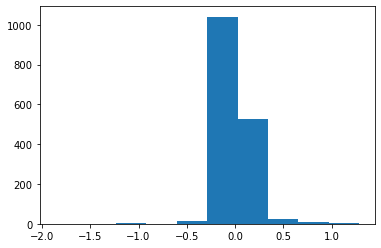

In [61]:
plt.hist(train_clusters[train_clusters.interior_clusterk6 == 0]['logerror'])

In [62]:
train_clusters[train_clusters.interior_clusterk6 == 0]['logerror'].abs().mean()

0.06955233626697876

In [63]:
train_clusters[train_clusters.interior_clusterk6 == 1]['logerror'].abs().mean()

0.07340950934656182

In [64]:
train_clusters[train_clusters.interior_clusterk6 == 2]['logerror'].abs().mean()

0.07141700710014462

In [65]:
train_clusters[train_clusters.interior_clusterk6 == 3]['logerror'].abs().mean()

0.07177977686117148

In [66]:
train_clusters[train_clusters.interior_clusterk6 == 4]['logerror'].abs().mean()

0.07283631756264358

In [67]:
train_clusters[train_clusters.interior_clusterk6 == 5]['logerror'].abs().mean()

0.06679235351584653

In [68]:
train_clusters['logerror_abs'] = train_clusters.logerror.abs()

In [69]:
train_clusters.logerror_abs.describe()

count    28378.000000
mean         0.071543
std          0.156521
min          0.000012
25%          0.014256
50%          0.032939
75%          0.070875
max          3.394544
Name: logerror_abs, dtype: float64

# Cluster 5

In [70]:
# list of variables I will cluster on. 
cluster_vars = ['bedrooms','bathrooms', 'sq_feet']
cluster_name = 'interior_clusterk5'

In [71]:
kmeans = create_clusters(X_train, 5, cluster_vars)

In [72]:
kmeans

KMeans(n_clusters=5, random_state=123)

In [73]:
# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df


In [74]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

In [75]:
centroid_df

,interior_clusterk5,centroid_bedrooms,centroid_bathrooms,centroid_sq_feet
0,0,0.310134,0.195088,0.150513
1,1,0.515647,0.358127,0.262745
2,2,0.512993,0.175283,0.168058
3,3,0.646604,0.634378,0.431049
4,4,0.221884,0.003031,0.093456


In [76]:
# label cluster for each observation in X_train (X[0] in our X list of dataframes), 
# X_validate (X[1]), & X_test (X[2])

def assign_clusters(df, kmeans, cluster_vars, cluster_name, centroid_df):
    #for i in range(len(df)):
        clusters = pd.DataFrame(kmeans.predict(df[cluster_vars]), 
                            columns=[cluster_name], index=df.index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        df = pd.concat([df, clusters_centroids], axis=1)
        return df


In [77]:
X = assign_clusters(X_train, kmeans, cluster_vars, cluster_name, centroid_df)

In [78]:
X.head()

,bedrooms,bathrooms,sq_feet,interior_clusterk5,centroid_bedrooms,centroid_bathrooms,centroid_sq_feet
40409,0.333333,0.416667,0.275165,1,0.515647,0.358127,0.262745
23172,0.500000,0.500000,0.269389,1,0.515647,0.358127,0.262745
49707,0.500000,0.333333,0.195132,1,0.515647,0.358127,0.262745
36587,0.500000,0.333333,0.151609,1,0.515647,0.358127,0.262745
6405,0.333333,0.166667,0.092616,1,0.515647,0.358127,0.262745


In [79]:
pd.DataFrame(X.groupby(['interior_clusterk5', 'centroid_bedrooms','centroid_bathrooms', 'centroid_sq_feet'])['interior_clusterk5'].count())


,,,,interior_clusterk5
interior_clusterk5,centroid_bedrooms,centroid_bathrooms,centroid_sq_feet,
0,0.310134,0.195088,0.150513,11756
1,0.515647,0.358127,0.262745,5529
2,0.512993,0.175283,0.168058,4249
3,0.646604,0.634378,0.431049,1592
4,0.221884,0.003031,0.093456,5252


In [80]:
train_clusters = pd.concat([train, X['interior_clusterk5']], axis=1)

In [81]:
train_clusters

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_abs,interior_clusterk5
40409,14357041,-0.001358,3.5,3.0,2820.0,6059.0,33701815.0,-117717952.0,5492.0,52650.0,...,0.1,0.6,167.602837,0.5,119.641843,0.5,1.166667,0,0.001358,1
23172,11185767,0.044035,4.0,4.0,2764.0,6037.0,34610159.0,-118192962.0,6624.0,40227.0,...,0.2,0.6,37.442475,0.1,9.500302,0.2,1.000000,0,0.044035,1
49707,11471750,0.026075,3.0,4.0,2044.0,6037.0,33924794.0,-118423837.0,4967.0,55753.0,...,0.1,0.5,169.431996,0.5,158.594725,0.5,0.750000,0,0.026075,1
36587,14234304,-0.051115,3.0,4.0,1622.0,6059.0,33795264.0,-117827395.0,7399.0,33252.0,...,0.2,0.4,64.356350,0.2,46.887282,0.3,0.750000,0,0.051115,1
6405,12992951,0.110311,2.0,3.0,1050.0,6037.0,34048144.0,-117985938.0,5871.0,118895.0,...,0.1,0.2,89.523810,0.3,48.203032,0.3,0.666667,0,0.110311,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19982,17160255,0.007457,1.0,3.0,1000.0,6111.0,34205691.0,-119189493.0,6227.0,13150.0,...,0.1,0.1,99.748000,0.3,44.546652,0.3,0.333333,0,0.007457,3
1766,11663538,0.039340,3.0,4.0,2570.0,6037.0,34043592.0,-118526193.0,9006.0,12447.0,...,0.2,0.6,86.240467,0.3,84.465356,0.4,0.750000,1,0.039340,3
5102,12185674,1.191672,2.0,3.0,1292.0,6037.0,33988365.0,-118249664.0,3810.0,396053.0,...,0.0,0.3,72.534830,0.2,44.900000,0.3,0.666667,0,1.191672,3
34399,10731267,0.005839,2.0,3.0,2291.0,6037.0,34181498.0,-118619048.0,35778.0,12447.0,...,0.4,0.5,23.042340,0.0,1.400106,0.1,0.666667,1,0.005839,3


In [82]:
pd.DataFrame(train_clusters.groupby(['interior_clusterk5'])['interior_clusterk5'].count())


,interior_clusterk5
interior_clusterk5,
0,11756
1,5529
2,4249
3,1592
4,5252


<AxesSubplot:xlabel='bedrooms', ylabel='logerror'>

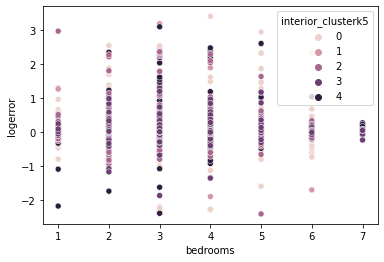

In [83]:
sns.scatterplot(train_clusters.bedrooms, train_clusters.logerror, hue=train_clusters.interior_clusterk5)

<AxesSubplot:xlabel='sq_feet', ylabel='logerror'>

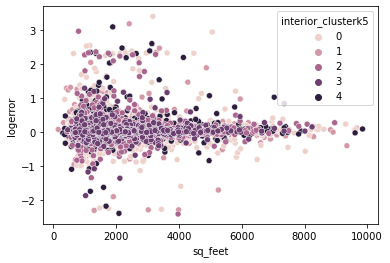

In [84]:
sns.scatterplot(train_clusters.sq_feet, train_clusters.logerror, hue=train_clusters.interior_clusterk5)

In [85]:
#train_clusters[train_clusters.interior_clusterk5 == 2]

In [86]:
#sns.scatterplot(train_clusters[train_clusters.interior_clusterk5 == 2].bedrooms, train_clusters[train_clusters.interior_clusterk5 == 2].logerror, hue=train_clusters.interior_clusterk5)

<AxesSubplot:xlabel='bath_bed_ratio', ylabel='logerror'>

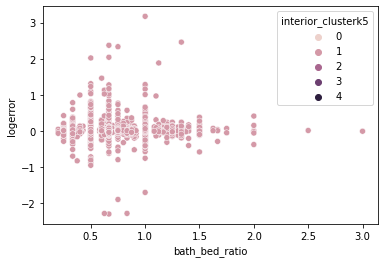

In [87]:
sns.scatterplot(train_clusters[train_clusters.interior_clusterk5 == 1].bath_bed_ratio, train_clusters[train_clusters.interior_clusterk5 == 1].logerror, hue=train_clusters.interior_clusterk5)

(array([4.000e+00, 1.000e+00, 3.000e+01, 4.772e+03, 6.856e+03, 5.600e+01,
        1.400e+01, 6.000e+00, 1.500e+01, 2.000e+00]),
 array([-2.26730161e+00, -1.70111704e+00, -1.13493248e+00, -5.68747909e-01,
        -2.56334127e-03,  5.63621226e-01,  1.12980579e+00,  1.69599036e+00,
         2.26217493e+00,  2.82835950e+00,  3.39454407e+00]),
 <BarContainer object of 10 artists>)

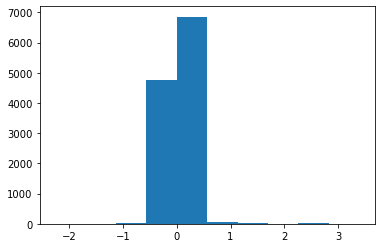

In [88]:
plt.hist(train_clusters[train_clusters.interior_clusterk5 == 0]['logerror'])

In [89]:
train_clusters[train_clusters.interior_clusterk5 == 0]['logerror'].abs().mean()

0.07117773664842093

In [90]:
train_clusters[train_clusters.interior_clusterk5 == 1]['logerror'].abs().mean()

0.07168506736555347

In [91]:
train_clusters[train_clusters.interior_clusterk5 == 2]['logerror'].abs().mean()

0.07323958582822017

In [92]:
train_clusters[train_clusters.interior_clusterk5 == 3]['logerror'].abs().mean()

0.06994762868536487

In [93]:
train_clusters[train_clusters.interior_clusterk5 == 4]['logerror'].abs().mean()

0.07132203015134952

In [94]:
train_clusters['logerror_abs'] = train_clusters.logerror.abs()

In [95]:
train_clusters.logerror_abs.describe()

count    28378.000000
mean         0.071543
std          0.156521
min          0.000012
25%          0.014256
50%          0.032939
75%          0.070875
max          3.394544
Name: logerror_abs, dtype: float64

In [102]:
alpha = .05

In [103]:
t, p = stats.ttest_1samp((train_clusters[train_clusters.interior_clusterk5 == 0]['logerror'].abs()), (train_clusters.logerror_abs.mean()))
print(t, p/2, alpha)


-0.2562653342789413 0.3988752236607514 0.05


In [104]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


In [105]:
t, p = stats.ttest_1samp((train_clusters[train_clusters.interior_clusterk5 == 1]['logerror'].abs()), (train_clusters.logerror_abs.mean()))
print(t, p/2, alpha)

0.0692647003786165 0.4723907142479463 0.05


In [106]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


In [107]:
t, p = stats.ttest_1samp((train_clusters[train_clusters.interior_clusterk5 == 2]['logerror'].abs()), (train_clusters.logerror_abs.mean()))
print(t, p/2, alpha)

0.6510083462449149 0.25753815543735425 0.05


In [108]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


In [109]:
t, p = stats.ttest_1samp((train_clusters[train_clusters.interior_clusterk5 == 3]['logerror'].abs()), (train_clusters.logerror_abs.mean()))
print(t, p/2, alpha)

-0.4773215288408034 0.3165993719464586 0.05


In [110]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


In [111]:
t, p = stats.ttest_1samp((train_clusters[train_clusters.interior_clusterk5 == 4]['logerror'].abs()), (train_clusters.logerror_abs.mean()))
print(t, p/2, alpha)

-0.09988070668636019 0.46022142323416315 0.05


In [112]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


# Cluster 7

In [113]:
# list of variables I will cluster on. 
cluster_vars = ['bedrooms','bathrooms', 'sq_feet']
cluster_name = 'interior_clusterk7'

In [114]:
kmeans = create_clusters(X_train, 7, cluster_vars)

In [115]:
kmeans

KMeans(n_clusters=7, random_state=123)

In [116]:
# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df


In [117]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)

In [118]:
centroid_df

,interior_clusterk7,centroid_bedrooms,centroid_bathrooms,centroid_sq_feet
0,0,0.339496,0.009590,0.106395
1,1,0.511039,0.178813,0.168544
2,2,0.542355,0.352210,0.256899
3,3,0.322120,0.342444,0.230038
4,4,0.644565,0.637572,0.434681
5,5,0.331670,0.175145,0.142321
6,6,0.155645,0.053767,0.101089


In [119]:
# label cluster for each observation in X_train (X[0] in our X list of dataframes), 
# X_validate (X[1]), & X_test (X[2])

def assign_clusters(df, kmeans, cluster_vars, cluster_name, centroid_df):
    #for i in range(len(df)):
        clusters = pd.DataFrame(kmeans.predict(df[cluster_vars]), 
                            columns=[cluster_name], index=df.index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        df = pd.concat([df, clusters_centroids], axis=1)
        return df


In [120]:
X = assign_clusters(X_train, kmeans, cluster_vars, cluster_name, centroid_df)

In [121]:
X.head()

,bedrooms,bathrooms,sq_feet,interior_clusterk7,centroid_bedrooms,centroid_bathrooms,centroid_sq_feet
40409,0.333333,0.416667,0.275165,3,0.32212,0.342444,0.230038
23172,0.500000,0.500000,0.269389,3,0.32212,0.342444,0.230038
49707,0.500000,0.333333,0.195132,3,0.32212,0.342444,0.230038
36587,0.500000,0.333333,0.151609,3,0.32212,0.342444,0.230038
6405,0.333333,0.166667,0.092616,3,0.32212,0.342444,0.230038


In [122]:
pd.DataFrame(X.groupby(['interior_clusterk7', 'centroid_bedrooms','centroid_bathrooms', 'centroid_sq_feet'])['interior_clusterk7'].count())


,,,,interior_clusterk7
interior_clusterk7,centroid_bedrooms,centroid_bathrooms,centroid_sq_feet,
0,0.339496,0.009590,0.106395,2407
1,0.511039,0.178813,0.168544,4133
2,0.542355,0.352210,0.256899,4964
3,0.322120,0.342444,0.230038,2495
4,0.644565,0.637572,0.434681,1563
5,0.331670,0.175145,0.142321,8219
6,0.155645,0.053767,0.101089,4597


In [123]:
train_clusters = pd.concat([train, X['interior_clusterk7']], axis=1)

In [124]:
train_clusters

,parcelid,logerror,bathrooms,bedrooms,sq_feet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,...,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola,logerror_abs,interior_clusterk7
40409,14357041,-0.001358,3.5,3.0,2820.0,6059.0,33701815.0,-117717952.0,5492.0,52650.0,...,0.1,0.6,167.602837,0.5,119.641843,0.5,1.166667,0,0.001358,3
23172,11185767,0.044035,4.0,4.0,2764.0,6037.0,34610159.0,-118192962.0,6624.0,40227.0,...,0.2,0.6,37.442475,0.1,9.500302,0.2,1.000000,0,0.044035,3
49707,11471750,0.026075,3.0,4.0,2044.0,6037.0,33924794.0,-118423837.0,4967.0,55753.0,...,0.1,0.5,169.431996,0.5,158.594725,0.5,0.750000,0,0.026075,3
36587,14234304,-0.051115,3.0,4.0,1622.0,6059.0,33795264.0,-117827395.0,7399.0,33252.0,...,0.2,0.4,64.356350,0.2,46.887282,0.3,0.750000,0,0.051115,3
6405,12992951,0.110311,2.0,3.0,1050.0,6037.0,34048144.0,-117985938.0,5871.0,118895.0,...,0.1,0.2,89.523810,0.3,48.203032,0.3,0.666667,0,0.110311,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19982,17160255,0.007457,1.0,3.0,1000.0,6111.0,34205691.0,-119189493.0,6227.0,13150.0,...,0.1,0.1,99.748000,0.3,44.546652,0.3,0.333333,0,0.007457,4
1766,11663538,0.039340,3.0,4.0,2570.0,6037.0,34043592.0,-118526193.0,9006.0,12447.0,...,0.2,0.6,86.240467,0.3,84.465356,0.4,0.750000,1,0.039340,4
5102,12185674,1.191672,2.0,3.0,1292.0,6037.0,33988365.0,-118249664.0,3810.0,396053.0,...,0.0,0.3,72.534830,0.2,44.900000,0.3,0.666667,0,1.191672,4
34399,10731267,0.005839,2.0,3.0,2291.0,6037.0,34181498.0,-118619048.0,35778.0,12447.0,...,0.4,0.5,23.042340,0.0,1.400106,0.1,0.666667,1,0.005839,4


In [125]:
pd.DataFrame(train_clusters.groupby(['interior_clusterk7'])['interior_clusterk7'].count())


,interior_clusterk7
interior_clusterk7,
0,2407
1,4133
2,4964
3,2495
4,1563
5,8219
6,4597


In [127]:
#sns.scatterplot(train_clusters.bedrooms, train_clusters.logerror, hue=train_clusters.interior_clusterk7)

In [ ]:
#sns.scatterplot(train_clusters.sq_feet, train_clusters.logerror, hue=train_clusters.interior_clusterk7)

In [ ]:
train_clusters[train_clusters.interior_clusterk7 == 2]

In [ ]:
sns.scatterplot(train_clusters[train_clusters.interior_clusterk7 == 2].bedrooms, train_clusters[train_clusters.interior_clusterk7 == 2].logerror, hue=train_clusters.interior_clusterk7)

In [ ]:
sns.scatterplot(train_clusters[train_clusters.interior_clusterk7 == 1].bath_bed_ratio, train_clusters[train_clusters.interior_clusterk7 == 1].logerror, hue=train_clusters.interior_clusterk7)

In [ ]:
plt.hist(train_clusters[train_clusters.interior_clusterk7 == 0]['logerror'])

In [ ]:
train_clusters[train_clusters.interior_clusterk7 == 0]['logerror'].abs().mean()

In [ ]:
train_clusters[train_clusters.interior_clusterk7 == 1]['logerror'].abs().mean()

In [ ]:
train_clusters[train_clusters.interior_clusterk7 == 2]['logerror'].abs().mean()

In [ ]:
train_clusters[train_clusters.interior_clusterk7 == 3]['logerror'].abs().mean()

In [ ]:
train_clusters[train_clusters.interior_clusterk7 == 4]['logerror'].abs().mean()

In [ ]:
train_clusters[train_clusters.interior_clusterk7 == 5]['logerror'].abs().mean()

In [ ]:
train_clusters['logerror_abs'] = train_clusters.logerror.abs()

In [ ]:
train_clusters.logerror_abs.describe()

# Cluster 4

In [ ]:
# list of variables I will cluster on. 
cluster_vars = ['bedrooms','bathrooms', 'sq_feet']
cluster_name = 'interior_clusterk4'

In [ ]:
kmeans = create_clusters(X_train, 4, cluster_vars)

In [ ]:
kmeans


In [ ]:
# get the centroids for each distinct cluster...

def get_centroids(kmeans, cluster_vars, cluster_name):
    # get the centroids for each distinct cluster...

    centroid_col_names = ['centroid_' + i for i in cluster_vars]

    centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
                               columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

    return centroid_df


In [ ]:
centroid_df = get_centroids(kmeans, cluster_vars, cluster_name)


In [ ]:
centroid_df

In [ ]:
# label cluster for each observation in X_train (X[0] in our X list of dataframes), 
# X_validate (X[1]), & X_test (X[2])

def assign_clusters(df, kmeans, cluster_vars, cluster_name, centroid_df):
    #for i in range(len(df)):
        clusters = pd.DataFrame(kmeans.predict(df[cluster_vars]), 
                            columns=[cluster_name], index=df.index)

        clusters_centroids = clusters.merge(centroid_df, on=cluster_name, copy=False).set_index(clusters.index.values)

        df = pd.concat([df, clusters_centroids], axis=1)
        return df

In [ ]:
X = assign_clusters(X_train, kmeans, cluster_vars, cluster_name, centroid_df)


In [ ]:
X.head()


In [ ]:
pd.DataFrame(X.groupby(['interior_clusterk4', 'centroid_bedrooms','centroid_bathrooms', 'centroid_sq_feet'])['interior_clusterk4'].count())


In [ ]:
train_clusters = pd.concat([train, X['interior_clusterk4']], axis=1)


In [ ]:
train_clusters


In [ ]:
pd.DataFrame(train_clusters.groupby(['interior_clusterk4'])['interior_clusterk4'].count())


In [ ]:
sns.scatterplot(train_clusters.bedrooms, train_clusters.logerror, hue=train_clusters.interior_clusterk4)


In [ ]:
sns.scatterplot(train_clusters.sq_feet, train_clusters.logerror, hue=train_clusters.interior_clusterk4)


In [ ]:
train_clusters[train_clusters.interior_clusterk4 == 2]


In [ ]:
sns.scatterplot(train_clusters[train_clusters.interior_clusterk4 == 2].bedrooms, train_clusters[train_clusters.interior_clusterk4 == 2].logerror, hue=train_clusters.interior_clusterk4)


In [ ]:
sns.scatterplot(train_clusters[train_clusters.interior_clusterk4 == 1].bath_bed_ratio, train_clusters[train_clusters.interior_clusterk4 == 1].logerror, hue=train_clusters.interior_clusterk4)


In [ ]:
plt.hist(train_clusters[train_clusters.interior_clusterk4 == 0]['logerror'])


In [ ]:
train_clusters[train_clusters.interior_clusterk4 == 0]['logerror'].abs().mean()


In [ ]:
train_clusters[train_clusters.interior_clusterk4 == 1]['logerror'].abs().mean()


In [ ]:
train_clusters[train_clusters.interior_clusterk4 == 2]['logerror'].abs().mean()


In [ ]:
train_clusters[train_clusters.interior_clusterk4 == 3]['logerror'].abs().mean()


In [ ]:
train_clusters[train_clusters.interior_clusterk4 == 4]['logerror'].abs().mean()


In [ ]:
train_clusters[train_clusters.interior_clusterk4 == 5]['logerror'].abs().mean()


In [ ]:
train_clusters['logerror_abs'] = train_clusters.logerror.abs()


In [ ]:
train_clusters.logerror_abs.describe()


In [ ]:
train_clusters.head()